## Observations and Insights 

1) From the summary statistics table, we can see that Capomulin and Ramicane have the lowest average tumor 
    volume. This would lead me to assume that they are the most promising treatments in the study.

2) I don't feel like the bar plot gives us a lot of information. I would have preferred to make a plot like
    the second pandas plot in my notebook. This shows the decrease in numbers of mice by time point for each
    treatment. I believe that this gives a better picture of the survival rates for each treatment. This gives
    further evidence of my first conclusion; that Capomulin and Ramicane were the best treatment options in this 
    study.

3) Given the correlation of 0.84 and the very low p value, I conclude that weight and tumor volume
    are correlated. 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how = 'outer')
full_data.head(12)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [145]:
# Checking the number of mice in the DataFrame.
mice_number = full_data['Mouse ID'].value_counts()
len(mice_number)

249

In [146]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = full_data[full_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [147]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = full_data.loc[full_data['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_data_clean = full_data.loc[full_data['Mouse ID'] != 'g989']
full_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [149]:
# Checking the number of mice in the clean DataFrame.
new_mice = full_data_clean['Mouse ID'].value_counts()
len(new_mice)

248

## Summary Statistics

In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = full_data_clean[['Drug Regimen', 'Tumor Volume (mm3)']]

mean_drugs = tumor_vol.groupby(['Drug Regimen']).mean()
mean_drugs = mean_drugs.rename(columns= {'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})
mean_drugs['Median Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).median()
mean_drugs['Variance Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).var()
mean_drugs['Std. Dev. Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).std()
mean_drugs['SEM Tumor Volume (mm3)'] = tumor_vol.groupby(['Drug Regimen']).sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_drugs

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [151]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


## Bar Plots

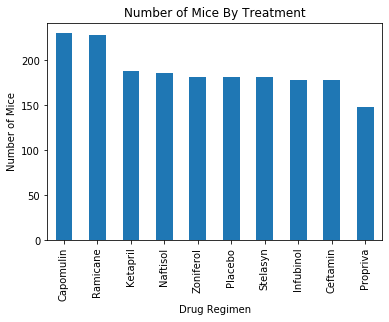

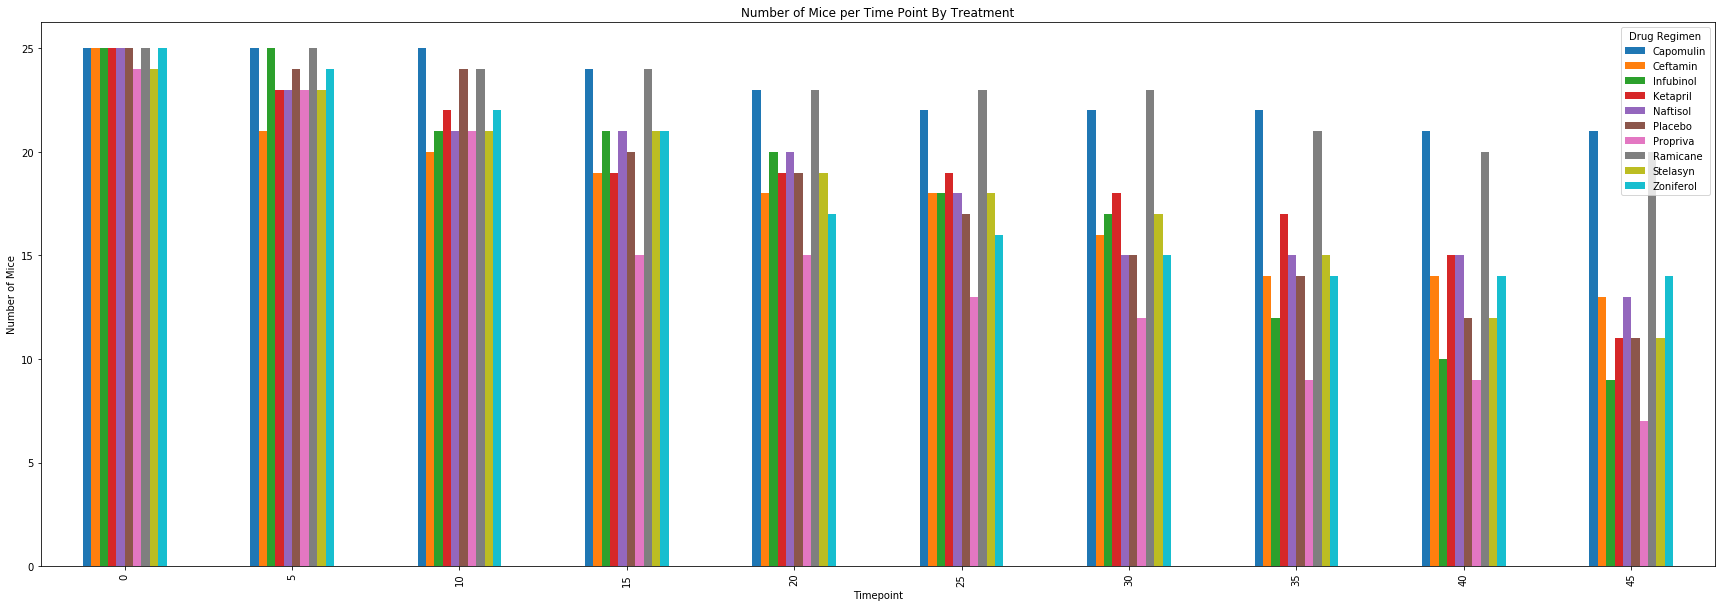

In [152]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

drugs_count = full_data_clean['Drug Regimen'].value_counts()
#.groupby(['Timepoint', 'Drug Regimen']).size().unstack()
drugs_count.head()
drugs_count.plot.bar()
plt.title('Number of Mice By Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

by_time = full_data_clean.groupby(['Timepoint', 'Drug Regimen']).size().unstack()
by_time.plot.bar(figsize=(30,10))
plt.title('Number of Mice per Time Point By Treatment')
plt.ylabel('Number of Mice')
plt.show()

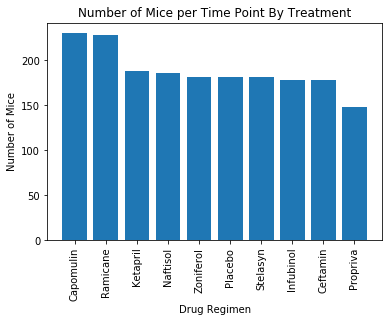

In [153]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Get values for x axis (drug names from drugs_count)
x_labels = np.arange(len(full_data_clean['Drug Regimen'].unique()))

# Get values for y
y_labels = drugs_count.values

tick_locations = [value for value in x_labels]
x_ticks = drugs_count.keys()

plt.bar(x_labels, y_labels, align= 'center')
plt.xticks(tick_locations, x_ticks, rotation= 'vertical')
#labels

plt.title('Number of Mice per Time Point By Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

## Pie Plots

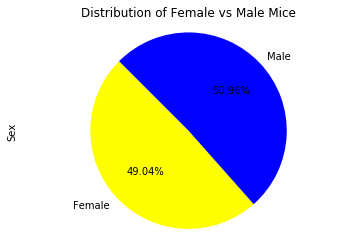

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender = full_data_clean.groupby(['Sex'])
by_gender_count = group_gender['Sex'].count()
gender = by_gender_count.keys()

by_gender_count.plot(kind = 'pie', y = gender, colors = ('yellow', 'blue'), startangle = 135, autopct='%0.2f%%', title = 'Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

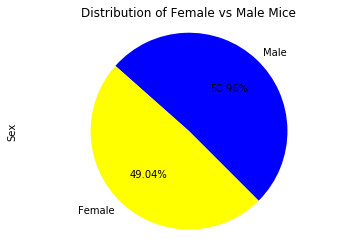

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
by_sex = full_data_clean['Sex'].value_counts()

labels = full_data_clean['Sex'].unique()
colors = ('blue', 'yellow')
by_gender_plot = plt.pie(by_sex, labels = labels, colors = colors, startangle = 315, autopct = '%0.2f%%')

plt.axis('equal')
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Get data for just Capomulin
capo_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Capomulin']

# Only retain final data point for each Mouse ID
capo_final_vol = capo_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])

# Pull only tumor volume for last data point
capo_final_vol_data = capo_final_vol['Tumor Volume (mm3)']
#print(capo_final_vol_data)
capo_quartiles = capo_final_vol_data.quantile([.25, .5, .75])
capolowerq = capo_quartiles[.25]
capoupperq = capo_quartiles[.75]
capo_iqr = capoupperq - capolowerq
print(f'The IQR for Capomulin is {capo_iqr}')
capolowerbound = round((capolowerq - (1.5* capo_iqr)),3)
capoupperbound = round((capoupperq + (1.5* capo_iqr)), 3)
print(f'The lower boundary for Capomulin is {capolowerbound}')
print(f'The upper boundary for Capomulin is {capoupperbound}')
# Search for outliers and print results
outliers_c = capo_final_vol_data.loc[(capo_final_vol_data < capolowerbound) | (capo_final_vol_data > capoupperbound)]
print(f'The outliers for Capomulin are: {outliers_c}')

The IQR for Capomulin is 7.781863460000004
The lower boundary for Capomulin is 20.705
The upper boundary for Capomulin is 51.832
The outliers for Capomulin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [157]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
infu_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Infubinol']
infu_final_vol = infu_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
infu_final_vol_data = infu_final_vol['Tumor Volume (mm3)']
#print(infu_final_vol_data)
infu_quartiles = infu_final_vol_data.quantile([.25, .5, .75])
infulowerq = infu_quartiles[.25]
infuupperq = infu_quartiles[.75]
infu_iqr = infuupperq - infulowerq
print(f'The IQR for Infubinol is {infu_iqr}')
infulowerbound = round((infulowerq - (1.5* infu_iqr)), 3)
infuupperbound = round((infuupperq + (1.5* infu_iqr)), 3)
print(f'The lower boundary for Infubinol is {infulowerbound}')
print(f'The upper boundary for Infubinol is {infuupperbound}')
# Search for outliers and print results
outliers_i = infu_final_vol_data.loc[(infu_final_vol_data < infulowerbound) | (infu_final_vol_data > infuupperbound)]
print(f'The outliers for Infubinol are: {outliers_i}')

The IQR for Infubinol is 11.477135160000003
The lower boundary for Infubinol is 36.833
The upper boundary for Infubinol is 82.741
The outliers for Infubinol are: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [158]:
rami_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Ramicane']
rami_final_vol = rami_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
rami_final_vol_data = rami_final_vol['Tumor Volume (mm3)']
#print(capo_final_vol_data)
rami_quartiles = rami_final_vol_data.quantile([.25, .5, .75])
ramilowerq = rami_quartiles[.25]
ramiupperq = rami_quartiles[.75]
rami_iqr = ramiupperq - ramilowerq
print(f'The IQR for Ramicane is {rami_iqr}')
ramilowerbound = round((ramilowerq - (1.5* rami_iqr)), 3)
ramiupperbound = round((ramiupperq + (1.5* rami_iqr)), 3)
print(f'The lower boundary for Ramicane is {ramilowerbound}')
print(f'The upper boundary for Ramicane is {ramiupperbound}')
# Search for outliers and print results
outliers_r = rami_final_vol_data.loc[(rami_final_vol_data < ramilowerbound) | (rami_final_vol_data > ramiupperbound)]
print(f'The outliers for Ramicane are: {outliers_r}')

The IQR for Ramicane is 9.098536719999998
The lower boundary for Ramicane is 17.913
The upper boundary for Ramicane is 54.307
The outliers for Ramicane are: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [159]:
cef_init = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Ceftamin']
cef_final_vol = cef_init.drop_duplicates(subset= ['Mouse ID'], keep= 'last').set_index(['Mouse ID'])
cef_final_vol_data = cef_final_vol['Tumor Volume (mm3)']
#print(cef_final_vol_data)
cef_quartiles = cef_final_vol_data.quantile([.25, .5, .75])
ceflowerq = cef_quartiles[.25]
cefupperq = cef_quartiles[.75]
cef_iqr = cefupperq - ceflowerq
print(f'The IQR for Ceftamin is {cef_iqr}')
ceflowerbound = round((ceflowerq - (1.5* cef_iqr)), 3)
cefupperbound = round((cefupperq + (1.5* cef_iqr)), 3)
print(f'The lower boundary for Ceftamin is {ceflowerbound}')
print(f'The upper boundary for Ceftamin is {cefupperbound}')
# Search for outliers and print results
outliers_ce = cef_final_vol_data.loc[(cef_final_vol_data < ceflowerbound) | (cef_final_vol_data > cefupperbound)]
print(f'The outliers for Ceftamin are: {outliers_ce}')

The IQR for Ceftamin is 15.577752179999997
The lower boundary for Ceftamin is 25.355
The upper boundary for Ceftamin is 87.666
The outliers for Ceftamin are: Series([], Name: Tumor Volume (mm3), dtype: float64)


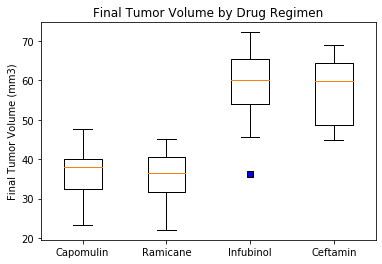

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Set criteria for outlier markers
marker_new = dict(markerfacecolor = 'b', marker = 's')

# Plot each drug on same figure and set labels to drug names
fig1, ax1,= plt.subplots()
box_whisk = plt.boxplot([capo_final_vol_data, rami_final_vol_data, infu_final_vol_data, cef_final_vol_data], 
            labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = marker_new)
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

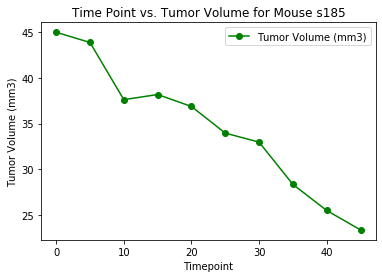

In [161]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Set mouse ID to be used
mouse = 's185'
one_mouse = full_data_clean.loc[full_data_clean['Mouse ID'] == mouse]

# Refine dataframe to columns that I need and plot line graph
one_mouse = one_mouse[['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
one_mouse
one_mouse.plot(kind = 'line', marker = 'o', color = 'green')
plt.title('Time Point vs. Tumor Volume for Mouse s185')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

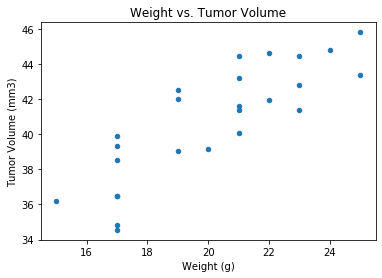

In [164]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create Dataframe of only capomulin
capomulin = full_data_clean.loc[full_data_clean['Drug Regimen'] == 'Capomulin']
# Find average tumor volume for each mouse
avg_capomulin = capomulin.groupby('Mouse ID').mean()
avg_capomulin
capo_scatter = avg_capomulin.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', title = 'Weight vs. Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between Weight and Tumor Volume is 0.84.
The linear regression model is y = 0.95x + 21.55.


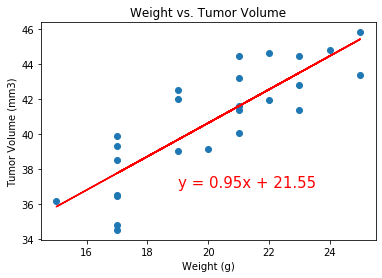

0.8419363424694718
1.3225722434712642e-07


In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']
correlation = stats.pearsonr(x_values, y_values)
print(f'The correlation between Weight and Tumor Volume is {round(correlation[0],2)}.')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression model is {line_eq}.')
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
plt.title('Weight vs. Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
print(rvalue)
print(pvalue)